MACHINE PROBLEM 3

Name: Maxyne Nuela Ignacio
Year & Section: BS Computer Science - IS - 4B

# **Step 1: Uninstall OpenCV Libraries**

In [ ]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

# **Step 2: Installing Development Tools and Dependencies**

In [ ]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


# **Step 3: Cloning OpenCV from Github**

In [ ]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337922, done.
remote: Counting objects: 100% (1142/1142), done.
remote: Compressing objects: 100% (889/889), done.
remote: Total 337922 (delta 499), reused 613 (delta 212), pack-reused 336780 (from 1)
Receiving objects: 100% (337922/337922), 528.64 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (235638/235638), done.
Updating files: 100% (7568/7568), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41838, done.
remote: Counting objects: 100% (1588/1588), done.
remote: Compressing objects: 100% (1153/1153), done.
remote: Total 41838 (delta 611), reused 1041 (delta 345), pack-reused 40250 (from 1)
Receiving objects: 100% (41838/41838), 150.38 MiB | 23.03 MiB/s, done.
Resolving deltas: 100% (25744/25744), done.


# **Step 4: Building Open CV from OpenSource**

In [ ]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/sum.avx2.cpp.o
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/im

# **Step 5: Load Images**

Mounted at /content/drive


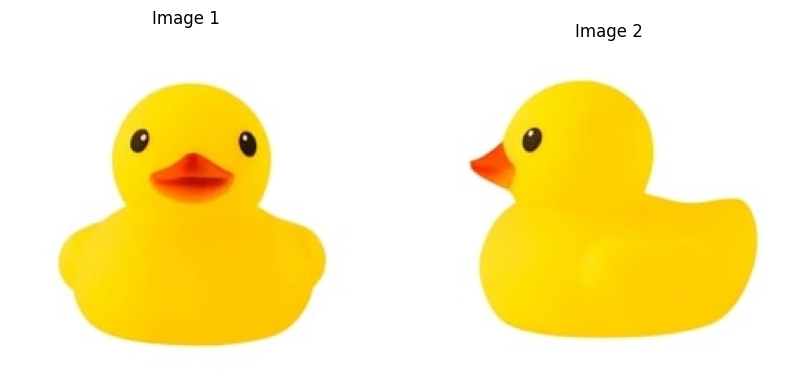

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Set paths to your images in Google Drive
image1_path = '/content/drive/My Drive/01-MP3.jpg'
image2_path = '/content/drive/My Drive/02-MP3.jpg'

# Load the images using OpenCV
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Check if images are loaded correctly
if image1 is None or image2 is None:
    print("Error loading images.")
    if image1 is None:
        print("Image 1 could not be loaded. Check the file path.")
    if image2 is None:
        print("Image 2 could not be loaded. Check the file path.")
else:
    # Convert BGR images to RGB for displaying with Matplotlib
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Display the images side-by-side
    plt.figure(figsize=(10, 5))

    # Display Image 1
    plt.subplot(1, 2, 1)
    plt.title("Image 1")
    plt.imshow(image1_rgb)
    plt.axis('off')

    # Display Image 2
    plt.subplot(1, 2, 2)
    plt.title("Image 2")
    plt.imshow(image2_rgb)
    plt.axis('off')

    plt.show()


# **Step 6: Feature Extraction**

In [ ]:
def extract_features(image1, image2):
    #SIFT.
    sift = cv2.SIFT_create()
    kp1_sift, des1_sift = sift.detectAndCompute(image1, None)
    kp2_sift, des2_sift = sift.detectAndCompute(image2, None)

    #SURF.
    surf = cv2.xfeatures2d.SURF_create()
    kp1_surf, des1_surf = surf.detectAndCompute(image1, None)
    kp2_surf, des2_surf = surf.detectAndCompute(image2, None)

    #ORB.
    orb = cv2.ORB_create()
    kp1_orb, des1_orb = orb.detectAndCompute(image1, None)
    kp2_orb, des2_orb = orb.detectAndCompute(image2, None)

    return (kp1_sift, des1_sift, kp2_sift, des2_sift), (kp1_surf, des1_surf, kp2_surf, des2_surf), (kp1_orb, des1_orb, kp2_orb, des2_orb)

#Extract features.
sift_features, surf_features, orb_features = extract_features(image1, image2)


# **Step 7: Coding for Brute and Flann Functions**

In [1]:
#Function for matching descriptors using Brute-Force Matcher.
def match_descriptors_bf(des1, des2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

#Function for matching descriptors using FLANN Matcher.
def match_descriptors_flann(des1, des2):
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    #Store only the good matches based on the Lowe's ratio test.
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

#Function to draw matches.
def draw_matches(image1, kp1, image2, kp2, matches):
    matched_image = cv2.drawMatches(image1, kp1, image2, kp2, matches, None,
                                     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

# **Step 8: Peform Sift, Surf, Orb, Flann, and Brute then Display**

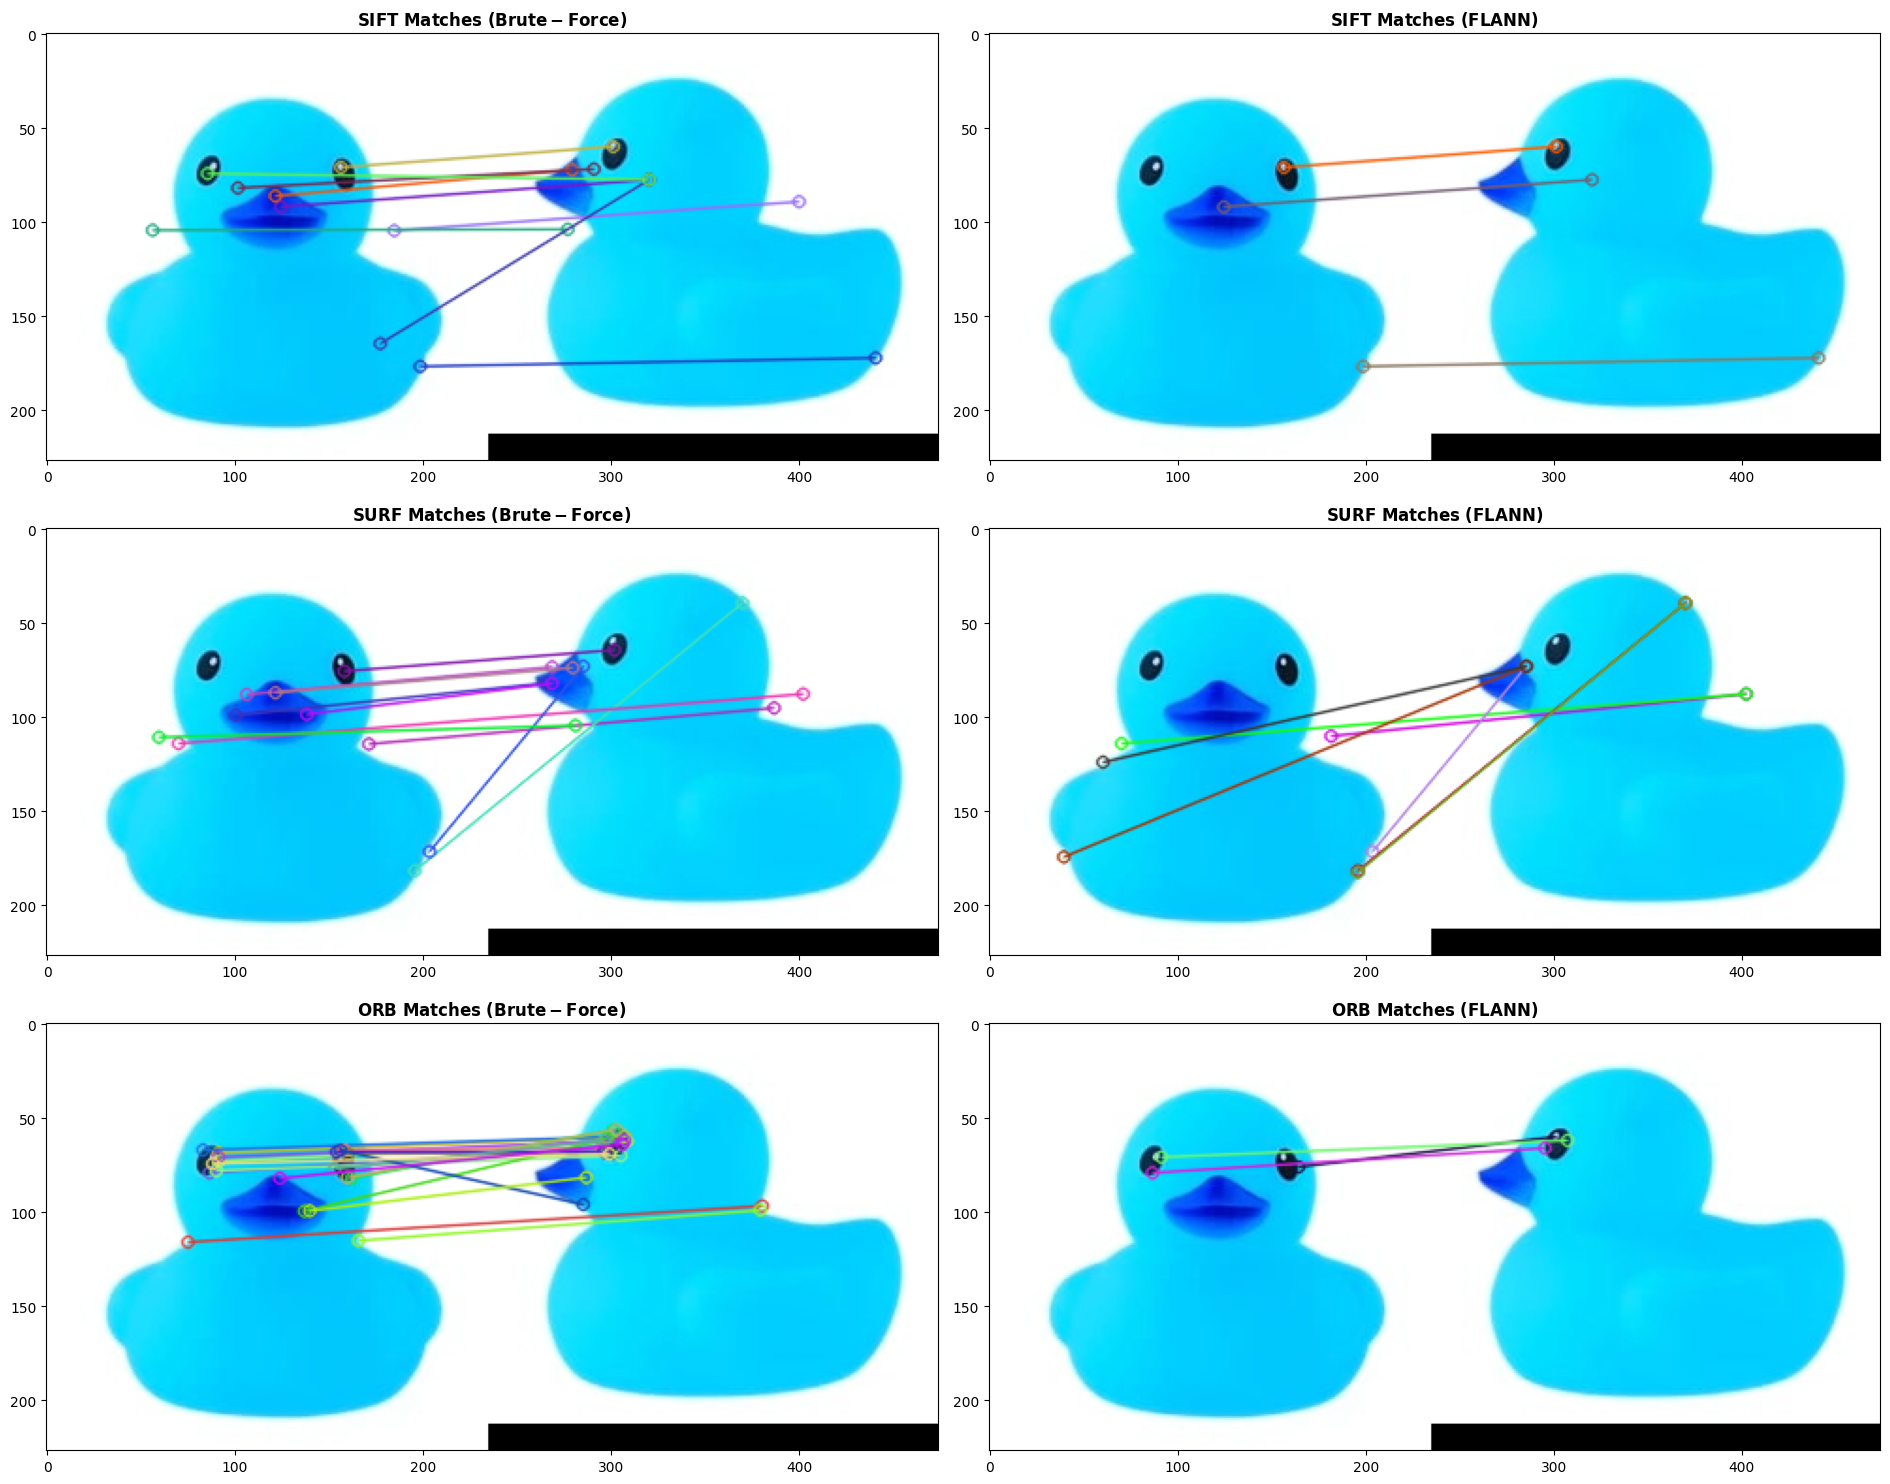

In [ ]:
#Perform matching for SIFT.
sift_matches_bf = match_descriptors_bf(sift_features[1], sift_features[3])
sift_matches_flann = match_descriptors_flann(sift_features[1], sift_features[3])

#Perform matching for SURF.
surf_matches_bf = match_descriptors_bf(surf_features[1], surf_features[3])
surf_matches_flann = match_descriptors_flann(surf_features[1], surf_features[3])

#Perform matching for ORB.
orb_matches_bf = match_descriptors_bf(orb_features[1], orb_features[3])
orb_matches_flann = match_descriptors_flann(orb_features[1].astype(np.float32), orb_features[3].astype(np.float32))

#Draw matches for each method.
sift_bf_matches_img = draw_matches(image1, sift_features[0], image2, sift_features[2], sift_matches_bf)
sift_flann_matches_img = draw_matches(image1, sift_features[0], image2, sift_features[2], sift_matches_flann)

surf_bf_matches_img = draw_matches(image1, surf_features[0], image2, surf_features[2], surf_matches_bf)
surf_flann_matches_img = draw_matches(image1, surf_features[0], image2, surf_features[2], surf_matches_flann)

orb_bf_matches_img = draw_matches(image1, orb_features[0], image2, orb_features[2], orb_matches_bf)
orb_flann_matches_img = draw_matches(image1, orb_features[0], image2, orb_features[2], orb_matches_flann)

#Display the matching results.
plt.figure(figsize=(19, 15))
#SIFT using Brute-Force Matcher.
plt.subplot(3, 2, 1)
plt.title(r'$\bf{SIFT\ Matches\ (Brute-Force)}$')
plt.imshow(sift_bf_matches_img)
#SIFT using FLANN Matcher.
plt.subplot(3, 2, 2)
plt.title(r'$\bf{SIFT\ Matches\ (FLANN)}$')
plt.imshow(sift_flann_matches_img)
#SURF using Brute-Force Matcher.
plt.subplot(3, 2, 3)
plt.title(r'$\bf{SURF\ Matches\ (Brute-Force)}$')
plt.imshow(surf_bf_matches_img)
#SURF using FLANN Matcher.
plt.subplot(3, 2, 4)
plt.title(r'$\bf{SURF\ Matches\ (FLANN)}$')
plt.imshow(surf_flann_matches_img)
#ORB using Brute-Force Matcher.
plt.subplot(3, 2, 5)
plt.title(r'$\bf{ORB\ Matches\ (Brute-Force)}$')
plt.imshow(orb_bf_matches_img)
#ORB using FLANN Matcher.
plt.subplot(3, 2, 6)
plt.title(r'$\bf{ORB\ Matches\ (FLANN)}$')
plt.imshow(orb_flann_matches_img)
plt.tight_layout()
plt.show()